# Atelier Python : manipuler et visualiser des tableaux de données avec Pandas.

## Premiers pas dans un *notebook*

Le code dans la cellule suivante importe le module date du package datetime. Ensuite, il utilise la fonction today() du module date pour obtenir la date actuelle. Enfin, il affiche la date actuelle en utilisant la fonction print().

In [1]:
## ---
## Q2

from datetime import date

today = date.today()
print("Nous sommes le", today)

Nous sommes le 2024-02-27


La cellule suivante demande à l'utilisateur d'entrer son nom en affichant le message "Quel est votre nom ?" et stocke l'information dans une variable nommée `name`.
Elle affiche ensuite le message "Bonjour {name}, nous sommes le {today}", où la variable `name` contient le texte donné par l'utilisateur, et la variable `today` provient de la cellule précédente. 

In [2]:
## ---
## Q3 & Q4

name = input("Quel est votre nom ?")
print(f"Bonjour {name}, nous sommes le {today.strftime('%d/%m/%Y')}")
# Bonus : `today.strftime('%d/%m/%Y')`
# permet de formater la date `today` au format jour/mois/année !

Bonjour Test, nous sommes le 27/02/2024


## Experimentations avec Pandas

In [ ]:
import pandas as pd

In [4]:
# Q7
data = {
    "nom_cassini": [
        "Neuf Village",
        "Nider Wise",
        "Haut Barville",
        "Nusveiller",
        "Ogy",
        "Rierange",
        "Braistroff",
        "Lamestroff",
    ],
    "pop_an3_val": [110, 391, 46, 139, 153, None, 75, 314],
    "pop_an8_val": [100, 309, 60, 94, 142, None, 53, 303],
    "pop_1806_val": [142, 410, 47, 166, 140, None, 59, 287],
}

populations = pd.DataFrame(data)
populations.set_index("nom_cassini", inplace=True)
populations

,pop_an3_val,pop_an8_val,pop_1806_val
nom_cassini,,,
Neuf Village,110.0,100.0,142.0
Nider Wise,391.0,309.0,410.0
Haut Barville,46.0,60.0,47.0
Nusveiller,139.0,94.0,166.0
Ogy,153.0,142.0,140.0
Rierange,NaN,NaN,NaN
Braistroff,75.0,53.0,59.0
Lamestroff,314.0,303.0,287.0


✏️ Q8. Sélections. 

In [5]:
# ---
# Q8

# Astuce bonus : au lieu de print, on peut utiliser display pour afficher le DataFrame
# Cela permet d'afficher une DataFrame avec la mise en forme de Jupyter
# Attention, ça ne fonctionne que dans un notebook Jupyter !

# Sélection de la colonne pop_1806_val
print("1. Population en 1806")
display(populations["pop_1806_val"])

# Sélection des colonnes pop_an3_val et pop_an8_val
print("2. Population en l'an 3 et en l'an 8")
display(populations[["pop_an3_val", "pop_an8_val"]])

# Sélection de la ligne portant l'étiquette 'Neuf Village'
print("3. Population de Neuf Village")
display(populations.loc["Neuf Village"])

# Sélection des lignes 'Neuf Village' à 'Ogy'
print("4. Population des villages de Neuf Village à Ogy")
display(populations.loc["Neuf Village":"Ogy"])

1. Population en 1806


nom_cassini
Neuf Village     142.0
Nider Wise       410.0
Haut Barville     47.0
Nusveiller       166.0
Ogy              140.0
Rierange           NaN
Braistroff        59.0
Lamestroff       287.0
Name: pop_1806_val, dtype: float64

2. Population en l'an 3 et en l'an 8


,pop_an3_val,pop_an8_val
nom_cassini,,
Neuf Village,110.0,100.0
Nider Wise,391.0,309.0
Haut Barville,46.0,60.0
Nusveiller,139.0,94.0
Ogy,153.0,142.0
Rierange,NaN,NaN
Braistroff,75.0,53.0
Lamestroff,314.0,303.0


3. Population de Neuf Village


pop_an3_val     110.0
pop_an8_val     100.0
pop_1806_val    142.0
Name: Neuf Village, dtype: float64

4. Population des villages de Neuf Village à Ogy


,pop_an3_val,pop_an8_val,pop_1806_val
nom_cassini,,,
Neuf Village,110.0,100.0,142.0
Nider Wise,391.0,309.0,410.0
Haut Barville,46.0,60.0,47.0
Nusveiller,139.0,94.0,166.0
Ogy,153.0,142.0,140.0


✏️ Q9. Sélection conditionnelle : masques booléens

In [6]:
# ---
# Q9

print(
    "Masque booléen : vrai si la population en l'an 3 est supérieure à 100, faux sinon"
)
display(populations["pop_an3_val"] > 100)

print(
    "Filtrage de la table par le masque précédent : seules les lignes pour lesquelles le masque est vrai sont conservées"
)
populations[populations["pop_an3_val"] > 100]

Masque booléen : vrai si la population en l'an 3 est supérieure à 100, faux sinon


nom_cassini
Neuf Village      True
Nider Wise        True
Haut Barville    False
Nusveiller        True
Ogy               True
Rierange         False
Braistroff       False
Lamestroff        True
Name: pop_an3_val, dtype: bool

Filtrage de la table par le masque précédent : seules les lignes pour lesquelles le masque est vrai sont conservées


,pop_an3_val,pop_an8_val,pop_1806_val
nom_cassini,,,
Neuf Village,110.0,100.0,142.0
Nider Wise,391.0,309.0,410.0
Nusveiller,139.0,94.0,166.0
Ogy,153.0,142.0,140.0
Lamestroff,314.0,303.0,287.0


In [7]:
# ---
# Q9 - suite

# Sélection des lignes dont la population en 1806 est inférieure à celle de l'an 3
print("Villages dont la population en 1806 est inférieure à celle de l'an 3")
display(populations[populations["pop_1806_val"] < populations["pop_an3_val"]])

Villages dont la population en 1806 est inférieure à celle de l'an 3


,pop_an3_val,pop_an8_val,pop_1806_val
nom_cassini,,,
Ogy,153.0,142.0,140.0
Braistroff,75.0,53.0,59.0
Lamestroff,314.0,303.0,287.0


✏️ Q10. Sélection conditionnelle multiple.

In [8]:
# ---
# Q10

# Sélection des villages dont la population en 1806 est supérieure à 100 mais inférieure à celle de l'an III.
print(
    "Villages dont la population en 1806 est supérieure à 100 mais inférieure à celle de l'an III."
)
populations[
    (populations["pop_1806_val"] < populations["pop_an3_val"])
    & (populations["pop_1806_val"] > 100)
]

Villages dont la population en 1806 est supérieure à 100 mais inférieure à celle de l'an III.


,pop_an3_val,pop_an8_val,pop_1806_val
nom_cassini,,,
Ogy,153.0,142.0,140.0
Lamestroff,314.0,303.0,287.0


In [9]:
# ---
# Q11

print("Structure de la table avant nettoyage", populations.shape)
populations.dropna(inplace=True, how="all")
print("Structure de la table après nettoyage", populations.shape)

Structure de la table avant nettoyage (8, 3)
Structure de la table après nettoyage (7, 3)


## Évolution démographique des communes de France.

In [10]:
# ---
# Q12

communes = pd.read_csv("../data/communes_de_france.csv", index_col="gid")
populations = pd.read_csv("../data/demographie_des_communes.csv", index_col="gid")

In [11]:
# Suppression des communes sans population
populations.dropna(
    inplace=True, how="all"
)  # on supprime les lignes avec uniquement des NaN

In [12]:
# ---
# Q13

communes_populations = communes.join(populations, how="inner")
communes_populations.head()

,type_cassini,nom_cassini,nom_an3,nom_1801,nom_1999,insee_2021,subdelegation,intendance,departement_1999,is_position_1999,...,1931,1936,1946,1954,1962,1968,1975,1982,1990,1999
gid,,,,,,,,,,,,,,,,,,,,,
8513,hameau,Neuf Village,Neuvillage,Neufvillage,Neufvillage,57501,Dieuze,Lorraine et Barrois,57,True,...,43.0,49.0,68.0,58.0,65.0,69.0,68.0,44.0,43.0,50.0
8518,hameau,Nider Wise,Niedrevisse,Nidervisse,Niedervisse,57507,Sarrelouis,Trois Évêchés ou Pays Messin,57,True,...,213.0,220.0,176.0,186.0,175.0,174.0,152.0,157.0,174.0,197.0
8521,hameau,Haut Barville,Barville,Barville (Haute),Barville-Haute,57509,Blamont,Lorraine et Barrois,57,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8525,hameau,Nusveiller,Nousseweiller,Nousviller,Nousseviller-lès-Bitche,57513,Bitche,Lorraine et Barrois,57,True,...,246.0,242.0,82.0,172.0,186.0,166.0,155.0,142.0,141.0,134.0
8536,hameau,Ogy,Ogy,Ogy,Ogy,57482,Metz,Trois Évêchés ou Pays Messin,57,True,...,105.0,107.0,99.0,79.0,90.0,92.0,131.0,132.0,255.0,439.0


/home/bertrand/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


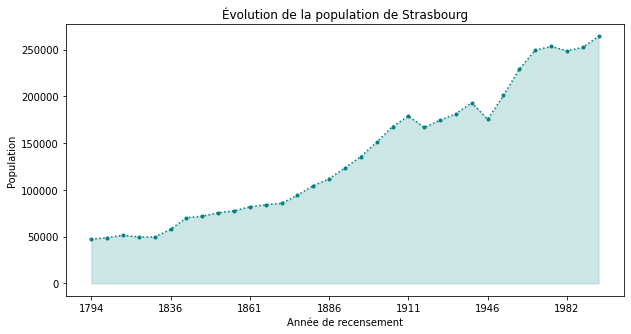

In [13]:
# ---
# Q14

from matplotlib import pyplot as plt

# Par étiquette / valeur d'index
commune_choisie = communes_populations.loc[41498]

# Par nom (on conserve la première ligne si plusieurs communes ont le même nom)
commune_choisie = communes_populations.loc[
    communes_populations.nom_1999 == "Strasbourg"
].iloc[0]


# De manière aléatoire
# commune_choisie = communes_populations.sample(1)
# display(commune_choisie)
commune_choisie_populations = commune_choisie.loc["1794":"1999"]
# display(commune_choisie_populations)

# On s'assure que les données de population sont des nombres flottants.
commune_choisie_populations = commune_choisie_populations.astype(float)

commune_choisie_populations.plot(
    title=f"Évolution de la population de {commune_choisie.nom_1999}",  # Titre du graphique
    xlabel="Année de recensement",  # Nom de l'axe des abscisses
    ylabel="Population",  # Nom de l'axe des ordonnées
    color="teal",  # Couleur de la ligne : bleu-vert, d'après https://matplotlib.org/stable/gallery/color/named_colors.html
    marker="o",  # Marqueur : cercle plein
    markersize=3,  # Taille des marqueurs : 3 points
    linestyle=":",  # Ligne pointillée
    figsize=(10, 5),  # Taille de la figure: largeur 10 pouces, hauteur 5 pouces
)

# Bonus : remplissage de l'aire sous la courbe
# Notez qu'on "dessine" d'abord la courbe,
# puis on remplit l'aire en appelant la méthode fill_between
# de Pyplot.
# fill_between colorie l'aire entre deux courbes, ou entre une courbe et l'axe des abscisses.
# Ici, on utilise une seule courbe, et on remplit l'aire entre entre elle etl'axe des abscisses.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(
    commune_choisie_populations.index,  # Les étiquettes de la Series servent d'abscisses
    commune_choisie_populations,  # Les valeurs de la Series servent d'ordonnées
    color="teal",  # Même couleur que la ligne
    alpha=0.2,  # Mais avec une opacité de 20% seulement
)

plt.show()

<Axes: title={'center': 'Carte de France des communes par population en 1806'}, xlabel='Longitude', ylabel='Latitude'>

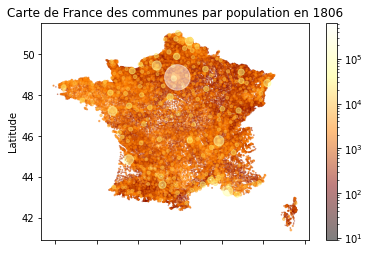

In [14]:
from matplotlib.colors import LogNorm

annee = "1806"
communes_populations.sort_values(annee, ascending=True, inplace=True)
communes_populations.plot.scatter(
    x="lon",
    y="lat",
    c=communes_populations[annee],
    s=communes_populations[annee] / 1000,
    alpha=0.5,
    norm=LogNorm(),
    colormap="afmhot",
    xlabel="Longitude",
    ylabel="Latitude",
    title=f"Carte de France des communes par population en {annee}",
)